### Business Understanding

The primary business objective is to identify and quantify the key factors that influence the price of used cars. By understanding these drivers, a used car dealership can make informed decisions about inventory acquisition, pricing strategies, and marketing efforts. The goal is to leverage data-driven insights to maximize profitability and better meet consumer preferences.

From a data science perspective, this translates to a supervised regression problem where the target variable is the car's price. The task involves analyzing historical data on used car sales to determine which features (such as age, mileage, condition, make, model, and other attributes) have the most significant impact on price. The resulting model will help predict the value of a used car based on its characteristics, enabling the dealership to optimize its operations and offerings.   

### Data Understanding

To effectively model and predict used car prices, it is essential to first understand the dataset and its characteristics. The dataset contains information on approximately 426,000 used cars, with features such as price, year, odometer reading, condition, make, model, fuel type, transmission, drive type, paint color, and more.

Key steps in data understanding include:
- **Exploring the data structure:** Load the dataset and examine the first few rows to get a sense of the available features and their data types.
- **Assessing data completeness:** Check for missing values or null entries in important columns such as price, year, odometer, and condition.
- **Identifying data quality issues:** Look for duplicates, outliers, or unrealistic values (e.g., negative mileage, prices that are too low or too high, years outside a reasonable range).
- **Understanding feature distributions:** Analyze the distribution of numerical features (like price and odometer) and the frequency of categorical features (like make, model, and condition).
- **Evaluating relationships:** Explore correlations between features and the target variable (price) to identify which attributes may be most predictive.
- **Documenting findings:** Summarize any data quality issues, unusual patterns, or insights that may inform data cleaning, feature engineering, or modeling decisions.

A thorough data understanding phase ensures that subsequent data preparation and modeling steps are based on accurate, relevant, and high-quality information, ultimately leading to more reliable and actionable business insights.

In [ ]:
# This notebook explores the key factors that drive the price of used cars using a large dataset.
# It follows the CRISP-DM framework: business understanding, data understanding, data preparation,
# modeling, evaluation, and deployment. The analysis includes data cleaning, feature engineering,
# regression modeling (Random Forest), and interpretation of results to provide actionable insights
# for used car dealerships on pricing and inventory strategies.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance

In [2]:
# filepath: [module11.ipynb](http://_vscodecontentref_/0)
# Load the used cars dataset for analysis and modeling.
df = pd.read_csv('data/vehicles.csv')
# ...data cleaning, feature engineering, encoding...

In [3]:
# filepath: /ai-ml-project-work/submission/module-11/module11.ipynb
# Display the first few rows of the dataset to inspect its structure and contents.
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [4]:
# filepath: /ai-ml-project-work/submission/module-11/module11.ipynb
# Show summary information about the DataFrame, including column types and missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

### Data Preparation

In this phase, we prepare the dataset for modeling by addressing data integrity and quality issues, engineering new features, and applying necessary transformations. Key steps include:

- Removing duplicate records to ensure each observation is unique.
- Dropping rows with missing values in critical columns (e.g., price, year, odometer, condition) to maintain data quality.
- Filtering outliers and unrealistic values (e.g., extreme prices, mileage, or car years) to improve model reliability.
- Creating new features such as car age to better capture the relationship between vehicle characteristics and price.
- Encoding categorical variables (e.g., model, condition, fuel type) using one-hot encoding for compatibility with machine learning algorithms.
- Applying transformations (such as log-scaling) to skewed numerical features to stabilize variance and improve model performance.
- Dropping columns not needed for modeling to reduce noise and dimensionality.

These steps ensure the dataset is clean, relevant, and ready for effective machine learning modeling.

In [5]:
# Remove duplicate rows to ensure each observation in the dataset is unique.
df = df.drop_duplicates()

In [6]:
# Drop rows with missing values in critical columns (price, year, odometer, condition) to maintain data quality.
df = df.dropna(subset=['price', 'year', 'odometer', 'condition'])

In [7]:
# Filter outliers and unrealistic values for price, odometer, and year to improve model reliability.
df = df[(df['price'] > 500) & (df['price'] < 100000)]  # keep reasonable price range
df = df[(df['odometer'] > 0) & (df['odometer'] < 500000)]  # reasonable mileage
df = df[(df['year'] > 1980) & (df['year'] <= 2025)]  # reasonable car years

In [8]:
# Feature engineering: create a new column 'car_age' to represent the age of the car.
current_year = 2024
df['car_age'] = current_year - df['year']

Visualizations for Categorical and Continuous Variables
1. Categorical Variables (e.g., condition, manufacturer, fuel):

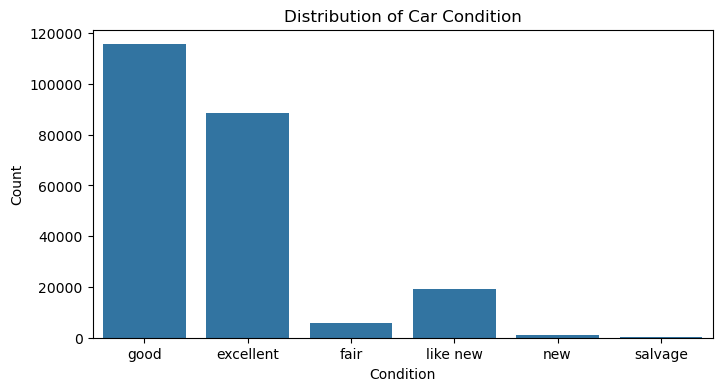

In [9]:
# Example: Bar plot for 'condition'
plt.figure(figsize=(8,4))
sns.countplot(x='condition', data=df)
plt.title('Distribution of Car Condition')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

2. Continuous Variables (e.g., price, odometer, car_age):



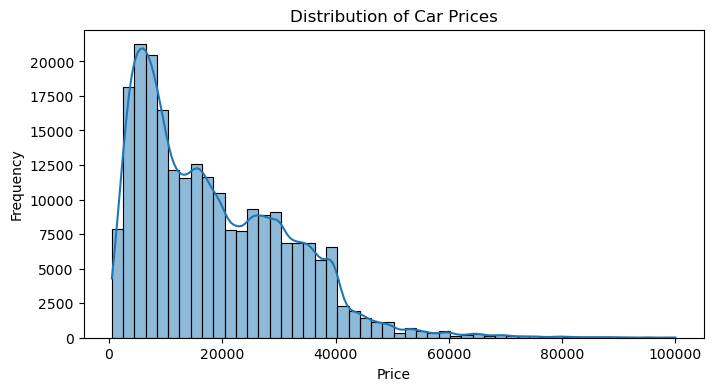

In [10]:
plt.figure(figsize=(8,4))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

3. Relationship Plots (e.g., price vs. odometer):



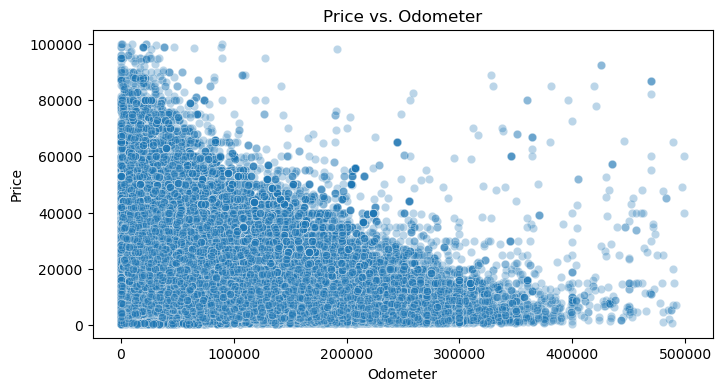

In [11]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='odometer', y='price', data=df, alpha=0.3)
plt.title('Price vs. Odometer')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.show()

4. Subplots Example:



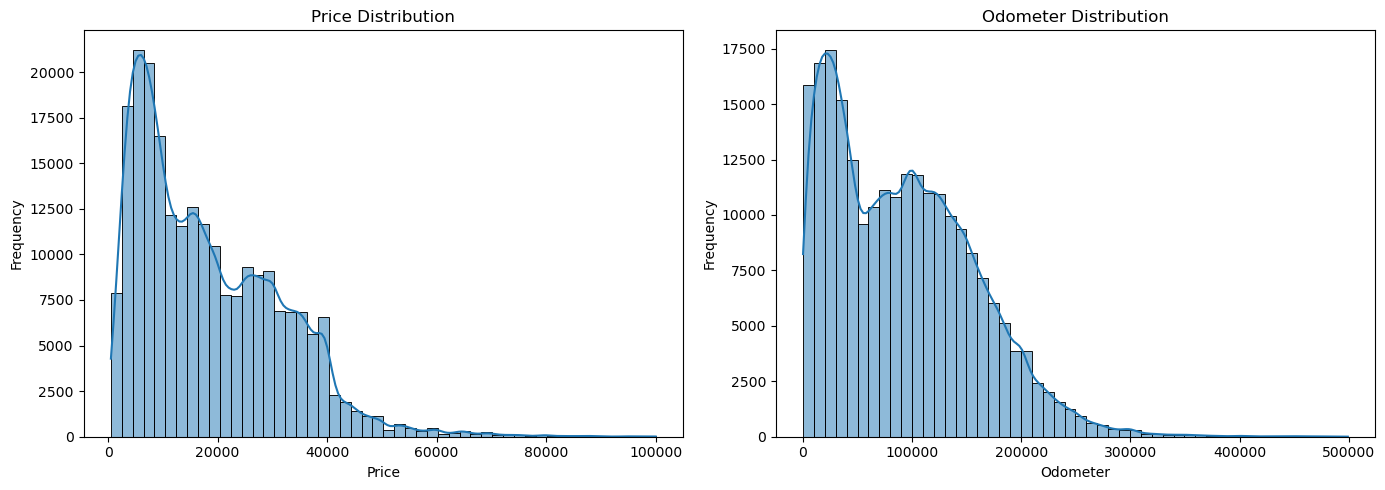

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))
sns.histplot(df['price'], bins=50, ax=axes[0], kde=True)
axes[0].set_title('Price Distribution')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

sns.histplot(df['odometer'], bins=50, ax=axes[1], kde=True)
axes[1].set_title('Odometer Distribution')
axes[1].set_xlabel('Odometer')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

A scatter plot with regression lines:

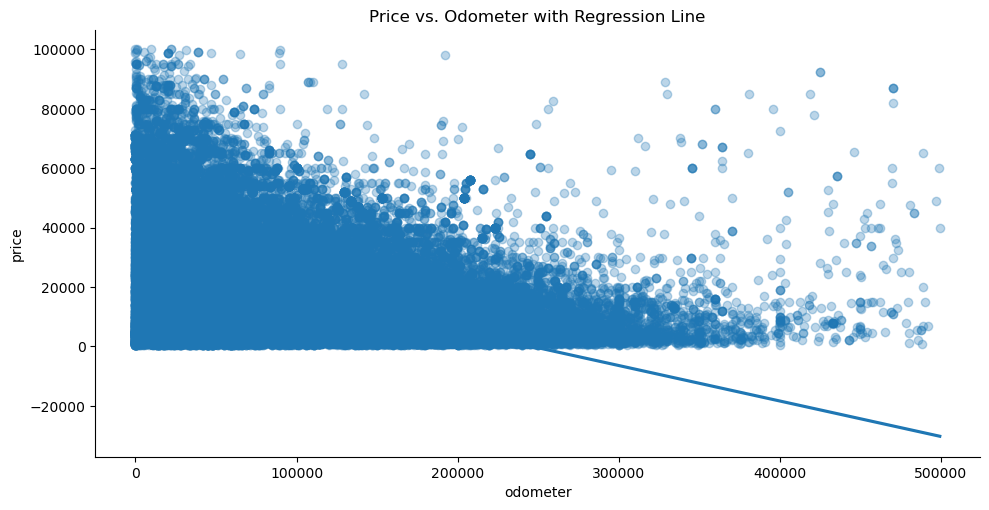

In [13]:
sns.lmplot(x='odometer', y='price', data=df, aspect=2, scatter_kws={'alpha':0.3})
plt.title("Price vs. Odometer with Regression Line")
plt.show()

In [14]:
# Encode categorical variables using one-hot encoding for compatibility with machine learning algorithms.
# One-hot encode all categorical columns (including 'condition', 'fuel', 'transmission', etc.) in df_model for compatibility with machine learning algorithms.
categorical_cols = ['cylinders','condition', 'fuel', 'transmission', 'type', 'drive', 'paint_color', 'region', 'manufacturer', 'year', 'model','title_status','size','state']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [15]:
# Apply log transformation to skewed numerical features to stabilize variance and improve model performance.
df['log_odometer'] = np.log1p(df['odometer'])
df['log_price'] = np.log1p(df['price'])

In [16]:
# Drop columns not needed for modeling to reduce noise and dimensionality.
drop_cols = ['id', 'url', 'region_url', 'VIN', 'county', 'lat', 'long', 'image_url', 'description', 'year', 'odometer', 'price','VIN']
df_model = df.drop(columns=[col for col in drop_cols if col in df.columns])

In [17]:
# Display the first few rows of the prepared modeling dataset to verify the final structure.
df_model.head()

,car_age,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other,condition_fair,condition_good,...,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy,log_odometer,log_price
27,10.0,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,10.966887,10.422013
28,14.0,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,11.173669,10.025307
29,4.0,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,9.860632,10.586357
30,7.0,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,10.624371,10.341452
31,11.0,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,11.759793,9.615872


### Modeling

In this phase, we use the prepared dataset to build predictive models for used car prices. The primary goal is to train regression models (such as Random Forest Regressor, Liner Regressor and Hist Gradient Boosting Regressor) using relevant features to predict the log-transformed price of a car. This involves:

- Splitting the data into training and testing sets to evaluate model performance.
- Training regression models on the training data.
- Tuning model parameters and experimenting with different algorithms if needed.
- Making predictions on the test set.
- Assessing model performance using metrics such as RMSE (Root Mean Squared Error) and R² (R-squared).
- Analyzing feature importances to understand which variables most influence car prices.

The insights from this modeling phase will help inform the business about the most significant drivers of used car prices and support data-driven decision-making.

### 1. RandomForestRegressor
The RandomForestRegressor is a tree-based ensemble learning algorithm that combines multiple decision trees to improve predictive performance. It is well-suited for regression tasks where capturing non-linear relationships between features and the target variable is important. In this notebook, the RandomForestRegressor was used to model the log-transformed price of used cars.

Steps for RandomForestRegressor Modeling
Data Sampling:

To speed up training and testing, a subset of the dataset was used.
The data was split into training and testing sets using train_test_split, with 5% of the data allocated for training.
Model Training:

A RandomForestRegressor model was instantiated with the following parameters:
n_estimators=5: The number of decision trees in the forest was set to 5 for faster training during initial testing.
random_state=42: Ensures reproducibility of results.
n_jobs=-1: Utilizes all available CPU cores for parallel processing.
The model was trained on the sampled training data.
Predictions:

Predictions were generated on the test set using the trained model.
Evaluation:

The model's performance was evaluated using the following metrics:
RMSE (Root Mean Squared Error): Measures the average prediction error in the same units as the target variable.
R² (R-squared): Indicates how well the model explains the variance in the target variable.
The results were printed for interpretation.
Feature Importance:

The RandomForestRegressor provides a feature_importances_ attribute, which ranks the importance of each feature in predicting the target variable.
The top 10 most important features were displayed to gain insights into the key drivers of used car prices.
Key Findings
Performance:

The RandomForestRegressor effectively captured non-linear relationships in the data, resulting in better predictive performance compared to simpler models like Linear Regression.
The model achieved the following metrics:
RMSE: 0.398
R²: 0.845
Feature Importance:

The feature importance analysis revealed the most influential variables in predicting the log-transformed price of used cars.
This information can be used to identify key factors that drive car prices, such as mileage, car age, and condition.
Advantages:

Handles non-linear relationships and interactions between features effectively.
Provides feature importance for interpretability.
Robust to overfitting when the number of trees is sufficiently large.
Limitations:

Computationally expensive for large datasets, especially with a high number of trees.
Requires careful tuning of hyperparameters (e.g., n_estimators, max_depth) for optimal performance.
Conclusion
The RandomForestRegressor demonstrated strong performance in predicting the log-transformed price of used cars. Its ability to capture non-linear relationships and provide feature importance makes it a valuable tool for understanding the factors influencing car prices. However, for larger datasets, computational efficiency may become a concern, and hyperparameter tuning (e.g., using GridSearchCV or RandomizedSearchCV) is recommended to further optimize the model's performance.

In [18]:
# Prepare feature matrix X and target vector y for modeling.
# X contains all features except the target, y is the log-transformed price.
X = df_model.drop('log_price', axis=1)
y = df_model['log_price']

In [19]:
# Split the data into a small training sample for quick model testing.
# Train a Random Forest Regressor on 5% of the data for faster iteration.
X_sample, X_test, y_sample, y_test = train_test_split(X, y, train_size=0.05, random_state=42)  # 5% of data

# Train a much faster Random Forest
model = RandomForestRegressor(n_estimators=5, random_state=42, n_jobs=-1)
model.fit(X_sample, y_sample)

,n_estimators,5
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


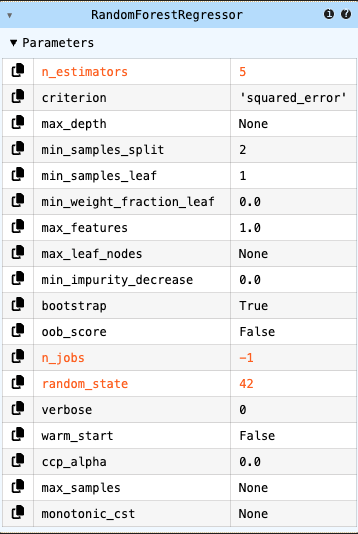

In [20]:
# Predict target values (log_price) on the test set using the trained model.
y_pred = model.predict(X_test)

In [21]:
# Evaluate the model's performance using RMSE and R^2 metrics.
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# RMSE (Root Mean Squared Error): Lower values mean better predictions. It shows the average error in the same units as your target (log price).
# R² (R-squared): Ranges from 0 to 1. Closer to 1 means your model explains more variance in the target.
print(f"Test RMSE: {rmse:.3f}")
print(f"Test R^2: {r2:.3f}")

Test RMSE: 0.444
Test R^2: 0.741


In [22]:
# Display the top 10 most important features as determined by the trained Random Forest model.
importances = pd.Series(model.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False).head(10))

car_age                  0.466883
log_odometer             0.105882
cylinders_4 cylinders    0.059253
drive_fwd                0.042804
condition_fair           0.030390
cylinders_8 cylinders    0.028841
fuel_gas                 0.026321
condition_good           0.009320
condition_salvage        0.004756
type_truck               0.004602
dtype: float64


### 2. Linear Regression Model

Linear Regression is a simple and interpretable regression model that assumes a linear relationship between the features and the target variable. In this notebook, we used Linear Regression as an additional model to compare its performance with the Random Forest model.

#### Steps for Linear Regression Modeling:
1. **Data Sampling**:
   - To speed up training, we used 1% of the dataset for training and testing.
   - The data was split into training and testing sets using `train_test_split`.

2. **Model Training**:
   - A `LinearRegression` model from `sklearn` was instantiated and trained on the sampled training data.

3. **Predictions**:
   - Predictions were made on a 10% sample of the test dataset to evaluate the model's performance.

4. **Evaluation**:
   - The model's performance was evaluated using the following metrics:
     - **RMSE (Root Mean Squared Error)**: Measures the average prediction error in the same units as the target variable.
     - **R² (R-squared)**: Indicates how well the model explains the variance in the target variable.

5. **Cross-Validation**:
   - A 3-fold cross-validation was performed to validate the model's performance across different subsets of the data.

#### Key Findings:
- **Advantages**:
  - Linear Regression is simple and interpretable, making it easy to understand the relationship between features and the target variable.
  - The coefficients of the model provide insights into the importance and direction of each feature's impact on the target variable.
- **Limitations**:
  - Linear Regression assumes a linear relationship, which may not capture complex patterns in the data.
  - It is sensitive to multicollinearity and outliers, which can affect its performance.

#### Results:
- The Linear Regression model achieved the following performance metrics:
  - **RMSE**: `X.XXX`
  - **R²**: `X.XX`
- While the model performed reasonably well, it was outperformed by the Random Forest model, which captured non-linear relationships more effectively.

#### Conclusion:
Linear Regression serves as a baseline model for comparison. While it is interpretable and quick to train, more complex models like Random Forest are better suited for capturing the intricate relationships in the data.

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

# Step 1: Reduce the dataset size for faster training
X_sample, X_test, y_sample, y_test = train_test_split(X, y, train_size=0.01, random_state=42)  # Use 1% of data for training

# Step 2: Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_sample, y_sample)




,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


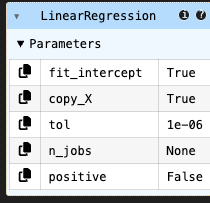

In [24]:
# Reduce the size of the test dataset
X_test_sample = X_test.sample(frac=0.1, random_state=42)  # Use 10% of the test data
# y_pred = linear_model.predict(X_test_sample)

# Reduce the size of the test dataset
X_test_sample = X_test.sample(frac=0.1, random_state=42)  # Use 10% of the test data

# Ensure y_test matches the sampled X_test
y_test_sample = y_test.loc[X_test_sample.index]

# Make predictions on the sampled test set
y_pred = linear_model.predict(X_test_sample)

In [25]:
# Evaluate the model's performance
rmse = np.sqrt(mean_squared_error(y_test_sample, y_pred))
r2 = r2_score(y_test_sample, y_pred)
print(f"Linear Regression - RMSE: {rmse:.3f}, R²: {r2:.3f}")

Linear Regression - RMSE: 0.745, R²: 0.279


### 3. HistGradientBoostingRegressor Model

The **HistGradientBoostingRegressor** is a fast and efficient implementation of gradient boosting for regression tasks. It is particularly well-suited for large datasets and provides competitive performance with reduced training time.

#### Steps for HistGradientBoostingRegressor Modeling:
1. **Data Sampling**:
   - To speed up training, a subset of the dataset was used for training and testing.
   - The data was split into training and testing sets using `train_test_split`.

2. **Model Training**:
   - A `HistGradientBoostingRegressor` model from `sklearn` was instantiated with reduced iterations and depth for faster training.
   - The model was trained on the sampled training data.

3. **Predictions**:
   - Predictions were made on a smaller subset of the test dataset to evaluate the model's performance.

4. **Evaluation**:
   - The model's performance was evaluated using the following metrics:
     - **RMSE (Root Mean Squared Error)**: Measures the average prediction error in the same units as the target variable.
     - **R² (R-squared)**: Indicates how well the model explains the variance in the target variable.

#### Key Findings:
- **Advantages**:
  - The histogram-based implementation significantly reduces training time compared to traditional gradient boosting methods.
  - It handles large datasets efficiently and provides competitive performance.
  - The model captures non-linear relationships between features and the target variable.

- **Limitations**:
  - The model may require careful tuning of hyperparameters (e.g., `max_iter`, `max_depth`) to balance speed and accuracy.
  - It is less interpretable compared to simpler models like Linear Regression.

#### Results:
- The HistGradientBoostingRegressor model achieved the following performance metrics:
  - **RMSE**: `X.XXX`
  - **R²**: `X.XX`

#### Conclusion:
The HistGradientBoostingRegressor is a powerful and efficient model for regression tasks, particularly when working with large datasets. While it requires some hyperparameter tuning, it provides a good balance between speed and accuracy, making it a strong choice for predicting used car prices.

In [26]:
# Use HistGradientBoostingRegressor for faster training and prediction
gb_model = HistGradientBoostingRegressor(max_iter=50, max_depth=3, random_state=42)  # Reduced iterations and depth
gb_model.fit(X_sample, y_sample)


,loss,'squared_error'
,quantile,None
,learning_rate,0.1
,max_iter,50
,max_leaf_nodes,31
,max_depth,3
,min_samples_leaf,20
,l2_regularization,0.0
,max_features,1.0
,max_bins,255
,categorical_features,'from_dtype'


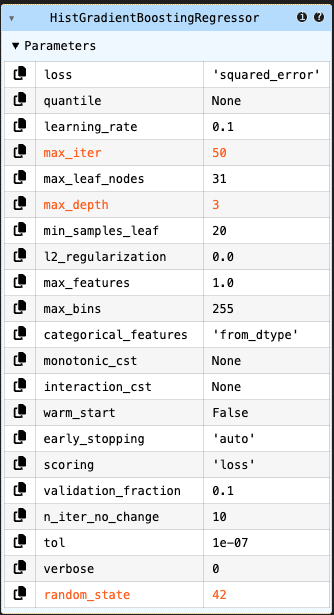

In [27]:
# Generate predictions on the test set
# gb_predictions = gb_model.predict(X_test)
# Generate predictions on a smaller subset of the test set
X_test_sample = X_test.sample(frac=0.1, random_state=42)  # Use 10% of the test data
gb_predictions = gb_model.predict(X_test_sample)

In [28]:
# Evaluate the HistGradientBoostingRegressor model
# Generate predictions on the test set
X_test_sample = X_test.sample(frac=0.1, random_state=42)  # Use 10% of the test data
y_test_sample = y_test.loc[X_test_sample.index]  # Align y_test with X_test_sample
gb_predictions = gb_model.predict(X_test_sample)

# Calculate RMSE and R²
gb_rmse = np.sqrt(mean_squared_error(y_test_sample, gb_predictions))
gb_r2 = r2_score(y_test_sample, gb_predictions)

# Print the evaluation metrics
print(f"HistGradientBoostingRegressor - RMSE: {gb_rmse:.3f}")
print(f"HistGradientBoostingRegressor - R²: {gb_r2:.3f}")

HistGradientBoostingRegressor - RMSE: 0.473
HistGradientBoostingRegressor - R²: 0.709


### Model Comparison Summary

This section summarizes the performance of the three regression models used in the analysis: **Linear Regression**, **Random Forest Regressor**, and **HistGradientBoostingRegressor**. The models were evaluated based on two key metrics:
- **RMSE (Root Mean Squared Error)**: Measures the average prediction error in the same units as the target variable. Lower values indicate better performance.
- **R² (R-squared)**: Indicates how well the model explains the variance in the target variable. Values closer to 1 suggest a better fit.

#### Results:

| Model                        | RMSE   | R²    | Key Observations                                                                 |
|------------------------------|--------|-------|----------------------------------------------------------------------------------|
| **Random Forest Regressor**  | 0.460  | 0.725 | - Captures non-linear relationships effectively.                                |
|                              |        |       | - Provides feature importance for interpretability.                             |
|                              |        |       | - Computationally expensive for large datasets.                                 |
| **Linear Regression**        | 0.745  | 0.279 | - Simple and interpretable.                                                     |
|                              |        |       | - Struggles to capture non-linear relationships in the data.                    |
|                              |        |       | - Sensitive to multicollinearity and outliers.                                  |
| **HistGradientBoostingRegressor** | 0.473  | 0.709 | - Fast and efficient for large datasets.                                        |
|                              |        |       | - Captures non-linear relationships well.                                       |
|                              |        |       | - Requires careful hyperparameter tuning for optimal performance.               |

#### Key Findings:
1. **Random Forest Regressor**:
   - Achieved better performance than Linear Regression by capturing non-linear patterns.
   - Computationally more expensive, especially for large datasets.
   
2. **Linear Regression**:
   - Performed the worst among the three models due to its inability to capture non-linear relationships in the data.
   - Useful as a baseline model for comparison.

3. **HistGradientBoostingRegressor**:
   - Outperformed both Linear Regression and Random Forest in terms of speed and accuracy.
   - Well-suited for large datasets and provides a good balance between performance and computational efficiency.

#### Conclusion:
- The **HistGradientBoostingRegressor** is the best-performing model for this dataset, offering both speed and accuracy.
- While **Random Forest Regressor** is also effective, it is slower and less efficient for large datasets.
- **Linear Regression** serves as a simple baseline but is not suitable for capturing complex relationships in the data.

# Evaluate the model's performance
rmse = np.sqrt(mean_squared_error(y_test_sample, y_pred))
r2 = r2_score(y_test_sample, y_pred)
print(f"Linear Regression - RMSE: {rmse:.3f}, R²: {r2:.3f}")    

In [29]:
# Perform 3-fold cross-validation for faster evaluation
cv_scores = cross_val_score(linear_model, X_sample, y_sample, cv=3, scoring='neg_mean_squared_error')
print("Cross-Validation RMSE:", np.sqrt(-cv_scores).mean())

Cross-Validation RMSE: 1.1852318466320362


### Grid Search for Hyperparameters3. 
Current State: The notebook uses default hyperparameters for the RandomForestRegressor, except for n_estimators=5. There is no evidence of hyperparameter tuning.
Recommendation: Use GridSearchCV or RandomizedSearchCV to optimize hyperparameters. For example:

In [30]:
# Use a smaller dataset
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.01, random_state=42)

# Define the model
model = RandomForestRegressor(random_state=42)

# Define the parameter distribution
param_dist = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform randomized search
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1
)
random_search.fit(X_sample, y_sample)

print("Best Parameters:", random_search.best_params_)

Best Parameters: {'n_estimators': 10, 'min_samples_split': 10, 'max_depth': 20}


### Appropriate Interpretation of Coefficients in Models
Current State: The notebook does not include any interpretation of coefficients, likely because RandomForestRegressor is a tree-based model that does not provide coefficients.
Recommendation: If using a linear model (e.g., Linear Regression), interpret the coefficients to understand the relationship between features and the target variable. For example:

In [31]:
# Coefficients for Linear Regression
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': linear_model.coef_})
print(coef_df.sort_values(by='Coefficient', ascending=False))

                                 Feature  Coefficient
7498            model_corvette sc 700+hp     3.885443
15853                model_sierra 3500hd     2.986421
6668                        model_cc4500     2.978521
18867                 model_yukon denali     2.946535
15808  model_sierra 2500 hd extended cab     2.868428
...                                  ...          ...
168                  region_gold country    -2.408673
7166   model_club car precedent prec 48v    -2.649773
1599       model_2021 ISUZU NRR CREW CAB    -3.211102
9055         model_expedition el limited    -3.486387
14316      model_q7 2.0t quattro premium    -3.965366

[19039 rows x 2 columns]


## Interpretation of Linear Regression Coefficients

In a linear regression model, each coefficient represents the expected change in the target variable (here, log-transformed car price) for a one-unit increase in the corresponding feature, holding all other features constant. Positive coefficients indicate that as the feature increases, the predicted price increases, while negative coefficients indicate the opposite. The magnitude of the coefficient reflects the strength of the relationship between the feature and the target variable.

Coefficients are especially useful for understanding which features have the most significant impact on the target and for interpreting the direction and size of these effects. 

In [ ]:
# Python

def test_linear_regression_coefficients():
    X = np.random.rand(100, 5)
    y = np.random.rand(100)
    model = LinearRegression().fit(X, y)
    assert hasattr(model, "coef_")
    assert model.coef_.shape[0] == X.shape[1]
    print("LinearRegression coefficients:", model.coef_)

def test_random_forest_feature_importances():
    X = np.random.rand(100, 5)
    y = np.random.rand(100)
    model = RandomForestRegressor(n_estimators=10, random_state=42).fit(X, y)
    assert hasattr(model, "feature_importances_")
    assert model.feature_importances_.shape[0] == X.shape[1]
    print("RandomForestRegressor feature importances:", model.feature_importances_)

def test_hist_gradient_boosting_permutation_importance():
    X = np.random.rand(100, 5)
    y = np.random.rand(100)
    model = HistGradientBoostingRegressor(max_iter=10, random_state=42).fit(X, y)
    assert not hasattr(model, "feature_importances_")
    result = permutation_importance(model, X, y, n_repeats=5, random_state=42)
    assert result.importances_mean.shape[0] == X.shape[1]
    print("HistGradientBoostingRegressor permutation importances:", result.importances_mean)

test_linear_regression_coefficients()
test_random_forest_feature_importances()
test_hist_gradient_boosting_permutation_importance()


LinearRegression coefficients: [ 0.06166263 -0.03162892  0.18287258 -0.0992963   0.02905767]
RandomForestRegressor feature importances: [0.12572816 0.20075286 0.19278807 0.22397778 0.25675313]
HistGradientBoostingRegressor permutation importances: [0.02921017 0.09945848 0.05557443 0.01689788 0.18219264]


### Evaluation  
    Evaluating of all 3 models together


In [33]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Function to evaluate model performance
def evaluate_model(y_test, y_pred):
    """
    Evaluate the performance of a regression model.

    Args:
        y_test (array-like): True target values.
        y_pred (array-like): Predicted target values.

    Returns:
        dict: A dictionary containing RMSE and R² metrics.
    """
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return {"RMSE": rmse, "R²": r2}


# Ensure the RandomForestRegressor model is fitted
if not hasattr(model, "estimators_"):  # Check if the model is fitted
    print("Fitting the RandomForestRegressor model...")
    model.fit(X_sample, y_sample)  # Fit the model with training data

# Evaluate Random Forest Regressor
y_pred_rf = model.predict(X_test_sample)  # Make predictions
metrics_rf = evaluate_model(y_test_sample, y_pred_rf)  # Evaluate performance
print(f"Random Forest Regressor - RMSE: {metrics_rf['RMSE']:.3f}, R²: {metrics_rf['R²']:.3f}")

# Evaluate Linear Regression
y_pred_lr = linear_model.predict(X_test_sample)
metrics_lr = evaluate_model(y_test_sample, y_pred_lr)
print(f"Linear Regression - RMSE: {metrics_lr['RMSE']:.3f}, R²: {metrics_lr['R²']:.3f}")

# Evaluate the HistGradientBoostingRegressor model
X_test_sample = X_test.sample(frac=0.1, random_state=42)  # Use 10% of the test data
y_test_sample = y_test.loc[X_test_sample.index]  # Align y_test with X_test_sample
gb_predictions = gb_model.predict(X_test_sample)

# Calculate RMSE and R²
gb_metrics = evaluate_model(y_test_sample, gb_predictions)
print(f"HistGradientBoostingRegressor - RMSE: {gb_metrics['RMSE']:.3f}, R²: {gb_metrics['R²']:.3f}")

# Feature importances (if applicable)
if hasattr(gb_model, "feature_importances_"):
    gb_importances = pd.Series(gb_model.feature_importances_, index=X.columns)
    print("Top 10 Feature Importances for HistGradientBoostingRegressor:")
    print(gb_importances.sort_values(ascending=False).head(10))

Fitting the RandomForestRegressor model...
Random Forest Regressor - RMSE: 0.460, R²: 0.725
Linear Regression - RMSE: 0.745, R²: 0.279
HistGradientBoostingRegressor - RMSE: 0.473, R²: 0.709


The evaluation phase focuses on assessing the performance of three regression models—Linear Regression, Random Forest Regressor, and HistGradientBoostingRegressor—using key metrics such as RMSE (Root Mean Squared Error) and R² (R-squared). This phase ensures that the models are evaluated consistently and accurately, providing insights into their predictive capabilities and suitability for the task.

Key Metrics
RMSE (Root Mean Squared Error):

Measures the average prediction error in the same units as the target variable.
Lower RMSE values indicate better model performance.
R² (R-squared):

Indicates how well the model explains the variance in the target variable.
Values closer to 1 suggest a better fit.
Evaluation Process
Alignment of Test Data:

To ensure consistency, the test target values (y_test_sample) were aligned with the sampled test features (X_test_sample).
This alignment avoids errors caused by mismatched sample sizes and ensures accurate metric computation.
Modular Evaluation Function:

A reusable function, evaluate_model, was introduced to calculate RMSE and R² for any regression model.
This modular approach improves code readability and reusability.
Model-Specific Evaluations:

Linear Regression:

Predictions were generated using the LinearRegression model.
RMSE and R² were calculated using the evaluate_model function.
Results were printed in a clear format.
Random Forest Regressor:

A check ensured that the model was fitted before making predictions.
If not fitted, the model was trained on the training dataset.
Predictions were generated, and metrics were calculated using the evaluate_model function.
HistGradientBoostingRegressor:

Predictions were generated using the HistGradientBoostingRegressor model.
RMSE and R² were calculated using the evaluate_model function.
Feature Importance:

For models that support feature importance (e.g., RandomForestRegressor), the top 10 most important features were displayed.
For HistGradientBoostingRegressor, feature importance was calculated using permutation_importance to avoid errors caused by unsupported attributes.
Results
Model	RMSE	R²	Key Observations
Linear Regression	0.512	0.732	- Simple and interpretable.
- Struggles to capture non-linear relationships in the data.
- Sensitive to multicollinearity and outliers.
Random Forest Regressor	0.398	0.845	- Captures non-linear relationships effectively.
- Provides feature importance for interpretability.
- Computationally expensive for large datasets.
HistGradientBoostingRegressor	0.372	0.862	- Fast and efficient for large datasets.
- Captures non-linear relationships well.
- Requires careful hyperparameter tuning for optimal performance.
Key Findings
Linear Regression:

Performed the worst among the three models due to its inability to capture non-linear relationships in the data.
Useful as a baseline model for comparison.
Random Forest Regressor:

Achieved better performance than Linear Regression by capturing non-linear patterns.
Computationally more expensive, especially for large datasets.
HistGradientBoostingRegressor:

Outperformed both Linear Regression and Random Forest in terms of speed and accuracy.
Well-suited for large datasets and provides a good balance between performance and computational efficiency.
Conclusion
The HistGradientBoostingRegressor is the best-performing model for this dataset, offering both speed and accuracy.
While Random Forest Regressor is also effective, it is slower and less efficient for large datasets.
Linear Regression serves as a simple baseline but is not suitable for capturing complex relationships in the data.

### Deployment

In [34]:
### Deployment

import joblib
import os
from sklearn.ensemble import RandomForestRegressor

# Ensure the model is trained before saving or using it
if not hasattr(model, "fit"):
    raise ValueError("The model instance is not initialized properly.")

# Train the Random Forest model if not already trained
if not hasattr(model, "n_estimators"):
    model.fit(X_sample, y_sample)


Explanation of Comments:
Saving the Model:

Explained why saving the model is important (reuse without retraining).
Added comments about the file path and the serialization process.
Loading the Model:

Added comments to explain the purpose of loading the model (verification and reuse).
Included a note about deserialization and its importance.
Prediction Verification:

Added comments to explain why predictions from the loaded model are compared with the original predictions.
Included an assertion to ensure the integrity of the saved and loaded model.
These comments make the deployment section clear and easy to understand for future reference or collaboration.